In [103]:
%matplotlib inline
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import svm
import numpy as np
import random

# load the data
iris  = load_iris()

# take the data
data_x = iris.data[::]
data_y = iris.target[::]

# combine the data, actually unnecessary, but looks better
new_dict = dict()
for index in range(len(data_x)):
    new_dict.update({str(data_x[index]): str(data_y[index])})

# print trainset & testset indexs
trainset_index = random.sample(range(0,len(new_dict)), 100) # random 100 training datas, D'
fullset_index = random.sample(range(0,len(new_dict)), len(new_dict)) # 147 total data, D
testset_index = list(set(fullset_index) - set(trainset_index)) # 47 testing data, D - D'
print("Trainset index : \n" + str(trainset_index) + "\n")
print("Testset index : \n" + str(testset_index))

# train set
train_data = [ data_x[index] for index in trainset_index ]
train_target = [ data_y[index] for index in trainset_index ]

# test set
test_data = [ data_x[index] for index in testset_index ]
test_target = [ data_y[index] for index in testset_index ]


Trainset index : 
[45, 66, 6, 68, 17, 137, 89, 13, 126, 107, 90, 22, 40, 11, 53, 82, 20, 133, 43, 119, 30, 47, 104, 95, 140, 19, 69, 61, 18, 12, 8, 108, 115, 15, 110, 142, 118, 135, 100, 130, 76, 42, 32, 81, 102, 36, 57, 71, 129, 26, 51, 2, 113, 5, 29, 79, 124, 62, 134, 86, 114, 4, 50, 88, 73, 28, 31, 52, 37, 44, 63, 91, 146, 60, 105, 48, 136, 70, 122, 138, 78, 74, 21, 38, 35, 23, 99, 139, 14, 34, 55, 123, 83, 97, 9, 93, 121, 106, 98, 141]

Testset index : 
[0, 1, 128, 3, 131, 132, 7, 10, 143, 16, 144, 145, 24, 25, 27, 33, 39, 41, 46, 49, 54, 56, 58, 59, 64, 65, 67, 72, 75, 77, 80, 84, 85, 87, 92, 94, 96, 101, 103, 109, 111, 112, 116, 117, 120, 125, 127]


Accurancy rate testset : 0.978723404255
Accurancy rate trainset : 0.97

Confusion Matrix testset: 
 [[14  0  0]
 [ 0 16  1]
 [ 0  0 16]]
Confusion Matrix trainset: 
 [[36  0  0]
 [ 0 30  3]
 [ 0  0 31]]
Reshaped confusion matrix testset : 
[14  0  0  0 16  1  0  0 16]
Reshaped confusion matrix trainset : 
[36  0  0  0 30  3  0  0 31]

P_trainset: 0.97 R_trainset: 0.97 F1_trainset: 0.97
P_testset: 0.978723404255 R_testset: 0.978723404255 F1_testset: 0.978723404255

trainset probability : 
[ 0.17550917  0.43540231  0.11535004  0.55065913  0.11440939  0.33983272
  0.60624271  0.16331515  0.39008454  0.41444567  0.5661335   0.08456056
  0.10730805  0.14118043  0.59626415  0.73575827  0.16300225  0.47757593
  0.09744504  0.45591787  0.18653944  0.1512015   0.27684457  0.67119212
  0.23299967  0.08748216  0.73376931  0.57578881  0.10807162  0.19873209
  0.19237163  0.41158572  0.21319824  0.04639035  0.31052342  0.31127551
  0.40387124  0.34198696  0.18798105  0.41617946  0.70331668  0.13985

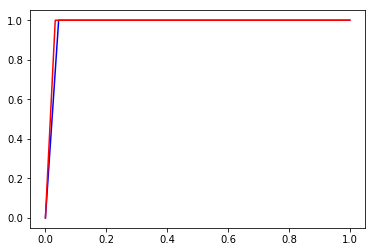

In [107]:
# SGDClassifier & SVC & LogisticRegresion

#clf = linear_model.SGDClassifier()
#clf = svm.SVC(kernel='linear',gamma=0.001,C=100)
clf = linear_model.LogisticRegression()
clf.fit(train_data,train_target)

# print accurancy rate
accurancy_rate_testset = accuracy_score(test_target, clf.predict(test_data))
accurancy_rate_trainset = accuracy_score(train_target, clf.predict(train_data))

print("Accurancy rate testset : " + str(accurancy_rate_testset))
print("Accurancy rate trainset : " + str(accurancy_rate_trainset) + "\n")

# print confusion matrix
confusion_train = confusion_matrix(train_target, clf.predict(train_data))
confusion_test = confusion_matrix(test_target, clf.predict(test_data))

print("Confusion Matrix testset: \n " + str(confusion_test))
print("Confusion Matrix trainset: \n " + str(confusion_train))
print("Reshaped confusion matrix testset : \n" + str(np.reshape(confusion_test, 9)))
print("Reshaped confusion matrix trainset : \n" + str(np.reshape(confusion_train, 9)) + "\n")

# print P, R, F1
P_train = metrics.precision_score(train_target, clf.predict(train_data),average='micro')
R_train = metrics.recall_score(train_target, clf.predict(train_data),average='micro')
F1_train = metrics.f1_score(train_target,clf.predict(train_data),average='micro')

P_test = metrics.precision_score(test_target, clf.predict(test_data),average='micro')
R_test = metrics.recall_score(test_target, clf.predict(test_data),average='micro')
F1_test = metrics.f1_score(test_target,clf.predict(test_data),average='micro')

print("P_trainset: "+ str(P_train) + " R_trainset: " + str(R_train) + " F1_trainset: " + str(F1_train))
print("P_testset: "+ str(P_test) + " R_testset: " + str(R_test) + " F1_testset: " + str(F1_test) + "\n")

# print each prediction's probability
predict_proba_train = clf.predict_proba(train_data)[:,1]
predict_proba_test = clf.predict_proba(test_data)[:,1]

print("trainset probability : \n" + str(predict_proba_train))
print("testset probability : \n" + str(predict_proba_test) + "\n")

# calculate AUC
fpr_test, tpr_test, threshhold_test = metrics.roc_curve(test_target, clf.predict(test_data),pos_label=2)
fpr_train, tpr_train, threshhold_train = metrics.roc_curve(train_target, clf.predict(train_data),pos_label=2)
auc_test = metrics.auc(fpr_test,tpr_test)
auc_train = metrics.auc(fpr_train,tpr_train)

print("AUC testset : " + str(auc_test))
print("AUC trainset : " + str(auc_train))

# draw ROC
plt.plot(fpr_train,tpr_train,color='blue')
plt.plot(fpr_test,tpr_test,color ='red')
